In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import dcc
from dash import html
import plotly.graph_objects as go
import plotly.graph_objs as go

Just checking the data of one stock as of now

In [82]:
CIPLA_df = pd.read_csv("D:\Study\Project\Stocks-Visualizing-and-Analysis\Cleaned Datasets\Cleaned Cipla.csv")
CIPLA_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,0,2018-04-02,548.00,578.95,545.90,576.25,562.83,2823880,CIPLA
1,1,2018-04-03,572.00,578.35,568.80,570.30,557.01,2493190,CIPLA
2,2,2018-04-04,572.35,575.45,564.50,569.80,556.53,1852997,CIPLA
3,3,2018-04-05,574.00,578.55,558.35,560.35,547.30,2396864,CIPLA
4,4,2018-04-06,560.30,571.00,557.25,558.95,545.93,2420324,CIPLA


# Stock Visualisation

OPEN PRICE VISUALIZATION

In [83]:
cipla_plot_line=px.line(x="Date",y="Open",data_frame=CIPLA_df,title="Cipla Open Price Visualization")
cipla_plot_line.show()

In [84]:
CIPLA_df['Open'].describe()

count     989.000000
mean      683.024065
std       179.660204
min       370.000000
25%       531.800000
50%       639.950000
75%       850.000000
max      1077.000000
Name: Open, dtype: float64

CLOSE PRICE VISUALIZATION

In [85]:
cipla_plot_line=px.line(x="Date",y="Close",data_frame=CIPLA_df,title="Cipla Close Price Visualization")
cipla_plot_line.show()

In [86]:
CIPLA_df['Close'].describe()

count     989.000000
mean      681.904904
std       179.425617
min       374.700000
25%       531.300000
50%       637.800000
75%       848.550000
max      1068.050000
Name: Close, dtype: float64

ADJ. CLOSE PRICE VISUALIZATION

In [87]:
cipla_plot_line=px.line(x="Date",y="Adj Close",data_frame=CIPLA_df,title="Cipla Adj. Close Price Visualization")
cipla_plot_line.show()

In [88]:
CIPLA_df['Adj Close'].describe()

count     989.000000
mean      673.702710
std       180.075243
min       370.840000
25%       520.950000
50%       627.730000
75%       839.810000
max      1062.890000
Name: Adj Close, dtype: float64

VOLUME PRICE VISUALIZATION

In [89]:
cipla_plot_line=px.line(x="Date",y="Volume",data_frame=CIPLA_df,title="Cipla Volume Price Visualization")
cipla_plot_line.show()

In [90]:
CIPLA_df['Volume'].describe()

count    9.890000e+02
mean     4.107482e+06
std      4.229454e+06
min      9.634700e+04
25%      1.708157e+06
50%      2.647759e+06
75%      5.072916e+06
max      5.689521e+07
Name: Volume, dtype: float64

In [106]:
cipla_plot_line=px.line(x="Date",y="High",data_frame=CIPLA_df,title="Cipla High Price Visualization")
cipla_plot_line.show()

In [92]:
CIPLA_df['High'].describe()

count     989.000000
mean      691.657381
std       181.088399
min       390.750000
25%       536.800000
50%       646.000000
75%       864.350000
max      1083.000000
Name: High, dtype: float64

In [105]:
cipla_plot_line=px.line(x="Date",y="Low",data_frame=CIPLA_df,title="Cipla Low Price Visualization")
cipla_plot_line.show()

In [94]:
CIPLA_df['Low'].describe()

count     989.000000
mean      681.904904
std       179.425617
min       374.700000
25%       531.300000
50%       637.800000
75%       848.550000
max      1068.050000
Name: Close, dtype: float64

# Day to Day percentage change (Daily returns)

Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices

Q)What does daily percentage means?

A)So if the stock opening price is 100rs and the stock closes as 150rs. So the percentage change here is 50%




Q)So what is now the day to day percentage change?

A)The daily return of day 1 and day 2. And the percentage change in the returns is day to day percentage change.


In [95]:
CIPLA_df['Day_Perc_Change'] = CIPLA_df['Adj Close'].pct_change()*100
CIPLA_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Name,Day_Perc_Change
0,0,2018-04-02,548.00,578.95,545.90,576.25,562.83,2823880,CIPLA,NaN
1,1,2018-04-03,572.00,578.35,568.80,570.30,557.01,2493190,CIPLA,-1.034060
2,2,2018-04-04,572.35,575.45,564.50,569.80,556.53,1852997,CIPLA,-0.086174
3,3,2018-04-05,574.00,578.55,558.35,560.35,547.30,2396864,CIPLA,-1.658491
4,4,2018-04-06,560.30,571.00,557.25,558.95,545.93,2420324,CIPLA,-0.250320


In [96]:
CIPLA_df.dropna(axis = 0, inplace = True)

In [97]:
cipla_plot_line=px.line(x="Date",y="Day_Perc_Change",data_frame=CIPLA_df,title="Percent Change Price Visualization")
cipla_plot_line.show()

I observed here that the mostly the spike is between the -2% and 2% and there are some few spikes between 10 to -10 percent on both the sides.

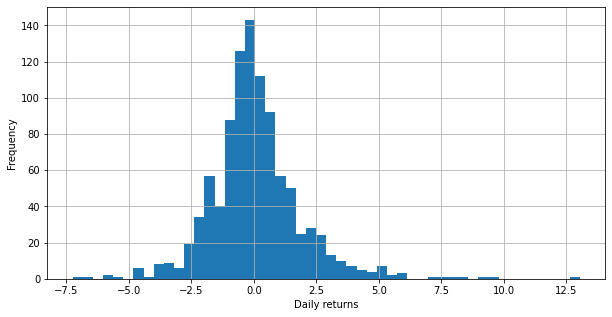

count    988.000000
mean       0.076328
std        1.845496
min       -7.256982
25%       -0.851701
50%       -0.055870
75%        0.830774
max       13.037224
Name: Day_Perc_Change, dtype: float64

In [98]:
CIPLA_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()#satistics
CIPLA_df.Day_Perc_Change.describe()

# Trend Analysis

Here we will make a function to define the trend. Will do it with the if  else statements.

In [99]:
def trend(x):
    if x > -0.5 and x <= 0.5:
        return 'Slight or No change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'
CIPLA_df['Trend']= np.zeros(CIPLA_df['Day_Perc_Change'].count())
CIPLA_df['Trend']= CIPLA_df['Day_Perc_Change'].apply(lambda x:trend(x))
CIPLA_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Name,Day_Perc_Change,Trend
1,1,2018-04-03,572.00,578.35,568.80,570.30,557.01,2493190,CIPLA,-1.034060,Negative
2,2,2018-04-04,572.35,575.45,564.50,569.80,556.53,1852997,CIPLA,-0.086174,Slight or No change
3,3,2018-04-05,574.00,578.55,558.35,560.35,547.30,2396864,CIPLA,-1.658491,Negative
4,4,2018-04-06,560.30,571.00,557.25,558.95,545.93,2420324,CIPLA,-0.250320,Slight or No change
5,5,2018-04-09,565.90,565.90,555.50,556.75,543.78,1470765,CIPLA,-0.393823,Slight or No change


In [108]:
pie_plot=px.pie(CIPLA_df,names='Trend',title="Cipla Trend Analysis")
pie_plot.show()

# Moving Average

In [102]:
ma_day = [10,20,50]

df1 =pd.DataFrame()
df1['Date']=CIPLA_df['Date']
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df1[column_name]=pd.DataFrame.rolling(CIPLA_df['Adj Close'],ma).mean() 

In [109]:
Cipla_close_price_ma=px.line(x='Date',y=['MA for 10 days','MA for 20 days','MA for 50 days'],data_frame=df1,title="Cipla MA")
Cipla_close_price_ma.show()

In [104]:
fig=go.Figure(data =[go.Candlestick(x=CIPLA_df.Date,open=CIPLA_df.Open,high=CIPLA_df.High,low=CIPLA_df.Low,close=CIPLA_df.Close)])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()